In [74]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.preprocessing.image import img_to_array
from keras.applications import imagenet_utils

import pandas as pd
import numpy as np
from PIL import Image
import urllib.request
import io

In [4]:
def load_model():
    # load the pre-trained Keras model (here we are using a model
    # pre-trained on ImageNet and provided by Keras, but you can
    # substitute in your own networks just as easily)
    global model
    model = ResNet50(weights="imagenet")

In [42]:
def prepare_image(image, target):
    # if the image mode is not RGB, convert it
    if image.mode != "RGB":
        image = image.convert("RGB")

    # resize the input image and preprocess it
    image = image.resize(target)
    print (type(image))
    
    image = img_to_array(image)
    print (type(image), image.shape)
    
    image = np.expand_dims(image, axis=0)
    print (type(image), image.shape)
    
    image = imagenet_utils.preprocess_input(image)
    print (type(image), image.shape)

    # return the processed image
    return image

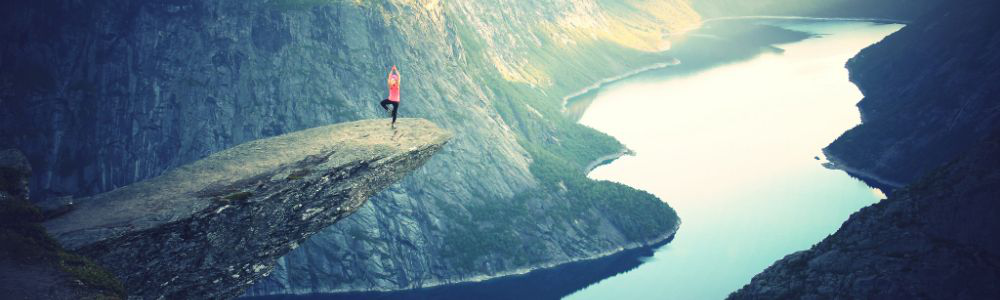

In [43]:
URL = 'http://www.w3schools.com/css/trolltunga.jpg'

with urllib.request.urlopen(URL) as url:
    f = io.BytesIO(url.read())

img = Image.open(f)

img

In [44]:
len(img.tobytes()), type(img.tobytes()), img.size, img.format

(900000, bytes, (1000, 300), 'JPEG')

In [45]:
# img_path = 'http://iridescent.date/static/phos/profile_sub_92/26_151252_1.jpg'
# img = image.load_img(img_path, target_size=(224, 224))

img2 = prepare_image(img, target=(224, 224))


<class 'PIL.Image.Image'>
<class 'numpy.ndarray'> (224, 224, 3)
<class 'numpy.ndarray'> (1, 224, 224, 3)
<class 'numpy.ndarray'> (1, 224, 224, 3)


In [46]:
type(img2), img2.shape, img2[0].shape

(numpy.ndarray, (1, 224, 224, 3), (224, 224, 3))

In [50]:
np.vstack([img2, img2]).shape

(2, 224, 224, 3)

In [77]:
%%time
preds = model.predict(img2)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
res = decode_predictions(preds, top=10)[0]
print(type(res))
df = pd.DataFrame(res, columns=['id','label','prob'])[['label', 'prob']]

<class 'list'>
CPU times: user 1.23 s, sys: 184 ms, total: 1.41 s
Wall time: 78.7 ms


In [78]:
df

,label,prob
0,cliff,0.588138
1,alp,0.218196
2,promontory,0.033096
3,lacewing,0.029254
4,wreck,0.019019
5,valley,0.013737
6,lakeside,0.010940
7,leatherback_turtle,0.010823
8,cicada,0.005664
9,grey_whale,0.005351


In [87]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.preprocessing.image import img_to_array
from keras.applications import imagenet_utils

from time import time
import pandas as pd
import numpy as np
from PIL import Image
import urllib.request
import io

In [80]:
test = 'http://iridescent.date/static/phos/profile_sub_92/26_151252_1.jpg'


In [ ]:
%%time
preds = model.predict(img2)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
res = decode_predictions(preds, top=10)[0]
print(type(res))
df = pd.DataFrame(res, columns=['id','label','prob'])[['label', 'prob']]

In [136]:
class PredPic(object):
    def __init__(self, url):
        start = time()
        self.model = ResNet50(weights="imagenet")
        with urllib.request.urlopen(url) as fh:
            f = io.BytesIO(fh.read())
        self.img = Image.open(f)
        self.main()
        print ('{:.2f} s'.format(time()-start))
    
    
    def prepare_image(self, image, target=(224, 224)):
        # if the image mode is not RGB, convert it
        if image.mode != "RGB":
            image = image.convert("RGB")

        # resize the input image and preprocess it
        image = image.resize(target)
        image = img_to_array(image)
        image = np.expand_dims(image, axis=0)
        image = imagenet_utils.preprocess_input(image)
        # return the processed image
        self.prepared = image
        return image
    
    def show(self):
        return self.img
    
    def result(self):
        return self.df
    
    def predict(self):
        preds = self.model.predict(self.prepared)
        # decode the results into a list of tuples (class, description, probability)
        # (one such list for each sample in the batch)
        res = decode_predictions(preds, top=10)[0]
        df = pd.DataFrame(res, columns=['id','label','prob'])[['label', 'prob']]
        df['prob'] = df['prob'].apply(lambda x: str(round(x*100,2)).ljust(5,'0')+'%')

        self.df = df
        return self.df
    
    def main(self):
        self.prepare_image(self.img)
        self.predict()



In [137]:
test = 'http://iridescent.date/static/phos/sub_76/862392523.jpg'

In [ ]:
a = PredPic(test)

In [ ]:
a.show()

In [ ]:
a.result()

In [130]:
b='123'

In [131]:
b.ljust(10,'o')

'123ooooooo'

In [135]:
a.df['new'] = a.df['prob'].apply(lambda x: str(round(x*100,2)).ljust(5,'0')+'%')
a.df

,label,prob,new
0,bow_tie,0.389200,38.92%
1,umbrella,0.061503,6.150%
2,suit,0.056531,5.650%
3,rifle,0.046761,4.680%
4,wardrobe,0.038925,3.890%
5,sunglass,0.036411,3.640%
6,military_uniform,0.025272,2.530%
7,trench_coat,0.024018,2.400%
8,picket_fence,0.018400,1.840%
9,mortarboard,0.017131,1.710%
